In [2]:
# 데이터셋 준비
import pandas as pd
import numpy as np 
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 회귀문제 데이터
data = load_diabetes()
X = data.data
y = data.target

# 2. 훈련 데이터와 테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 선형 회귀 (Linear Regression)

- 회귀(Regression)모델의 가장 큰 구분은 ①독립변수의 개수에 따라 단일회귀/다중회귀  ② "회귀계수"의 종류에 따라 선형회귀/비선형회귀로 구분된다. (비선형 회귀와 다항회귀를 혼동하면 안된다). 
- 선형회귀는 피쳐와 라벨간에 선형적인 관계가 있다고 가정하고 최적의 선형함수를 탐색한다. (실제는 선형적 관계가 아닐수 있음에도) 
- 회귀모델은 오류(=Cost=Loss function ; residual, RSS, MAE, MSE 등으로 측정)를 최소화하는 회귀계수 혹은 회귀선을 찾는것을 목적으로 한다. 
- 최적의 회귀계수를 찾는 대표적인 방법론 : Gradient Descent (경사하강법). Gradient는 Cost를 parameter(회귀계수)에 대해 편미분 한것이고. Cost 가 줄어드는 Negative Gradient 방향으로 Parameter를 지속 업데이트한다. OLS(일반선형회귀)는 최적 회귀선 찾는게 쉬워 굳이 Gradient Descent 를 사용하진 않는다. 
- Gradient Descent 방식에도 여러가지가 있는데, 주로 Stochastic Gradient Descent (≒ mini batch gradient) 방식 : 전체 데이터셋을 batch 단위로 나누어 실행 (300,000 records of data = 100 batches of 3000 size = 1 epoch)
- 선형회귀는 특정 독립변수의 회귀계수가 너무 크게되는 것을 방지하기위해 (overfitting 방지 목적으로) Regularization을 적용하는데, 적용방식에 따라 크게 OLS(기본), Lasso(L1), Ridge(L2), ElasticNet(L1+L2)로 구분한다. 
- 다중 회귀모델은, multi-collinearity problem(다중공선성문제). 즉, 독립변수간의 높은 상관관계가 존재할때 생기는 문제 해결이 매우 중요하다. 이를위해 변수간에 ①PCA 등 차원축소 전처리가 진행되며, ②Regularization 도 어느정도 다중 공선성을 해결한다. 
- 다중공선성의 문제점? y = 자동차 사고확률 , x1=혈중 알콜농도, x2=운전자 음주량 이라고 하면 x1 과 x2 의 상관계수가 1에 가깝기 때문에 메 학습마다 x1,x2의 회귀계수의 합만 일정하게 비율은 항상 크게 다를수 있다. 즉 계수에 대한 표준오차가 크다는것을 의미하고 통계적으로 회귀모델 유의성이 떨어지고 그만큼 해석력이 부족하고 과적합되기 쉽다 (모두 같은 의미) 

#### 규제 선형모델 (Regularized Linear Models) - Ridge, Lasso, ElasticNet

- 기존의 Cost Function 에서는 RSS의 최소화(Bias)만 고려하기 때문에 과적합(Variance)을 방지하기위한 장치로 Regularization 이 필요하다. (모든 예측모델은 Bias - Variance 균형이 필요하다) 
- Regularization은 아래와 같이 비용함수에 W 크기에 대한 penalty를 부여함으로서 과적합을 방지한다. 
- alpha 계수를 조정함으로서 Bias-Variance tradeoff 를 조정한다

1. Ridge 릿지 회귀 (L2)
- Ridge 회귀모델은 Regularization term 에 W^ (제곱)을 사용하는 규제 회귀모델이다. 
- Alpha 계수를 바꿔가며 교차검증 수행하는 코드. 데이터 사이즈가 크다면 Ridge(solver='sag')와 같이 gradient 방식으로 해를 찾을 수도 있다. 

In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100, 3000]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)  
   
    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    # 사이킷런의 모델 학습은 score 가 높은걸 목표로 학습하기에 MSE 에 negative 적용
    neg_mse_scores = cross_val_score(ridge, x_train, y_train, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))

# 애초에 greadsearchcv 를 사용해도됨. 

alpha 0 일 때 5 folds 의 평균 RMSE : 55.972 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 55.842 
alpha 1 일 때 5 folds 의 평균 RMSE : 60.185 
alpha 10 일 때 5 folds 의 평균 RMSE : 72.520 
alpha 100 일 때 5 folds 의 평균 RMSE : 77.293 
alpha 3000 일 때 5 folds 의 평균 RMSE : 77.958 


2. Lasso 라쏘 회귀 (L1) 
- Lasso 회귀모델은 Regularization term 에 |W| (절대값)을 사용하는 규제 회귀모델이다. 
- Ridge와의 비교: Ridge는 계수의 크기를 최대한 줄이는 방향인 반면, Lasso 는 불필요한 계수는 완전히 0 으로 만드는 Feature selection 에 가까운 모델이다. 

In [ ]:
from sklearn.linear_model import Lasso

3. ElasticNet 엘라스틱넷 회귀 (L1+L2) 
- ElasticNet 회귀모델은 L1,L2 규제를 결합한 형식의 회귀모델이다. 
- 상관관계가 높은 피쳐들중에 중요 피쳐만 선택하는 방식으로, 다중 공선성문제가 큰 데이터에 유리하다. 
- 파라미터는 alpha(L1,L2 가중치의 합), l1_ratio (L1 alpha / L1 + L2 alpha) 

In [ ]:
from sklearn.linear_model import ElasticNet  # l1_ratio: 0(L2) ~ 1(L1)

#### Regression Tree (회귀트리) -  CART

- Tree 기반의 Ensemble 모델. 분류모델에서 사용한것과 사용방법은 거의 동일함. 
- 일반적인 회귀모델은 최적의 회귀계수/회귀함수를 찾는것을 목적으로 학습했다. 반면, 회귀트리는 회귀함수를 기반으로 하지 않고, 결정트리와 같은 트리를 기반으로 한다. 
- 분류트리와의 차이점 ① leaf node 의 값이, 분류에서는 레이블의 특정 클래스값인데, 회귀에서는 해당 리프에 속한 데이터의 평균값이다. ② 규칙노드의 분류 기준이, 분류에서는 데이터의 균일도였다면, 회귀에서는 분산의 최소화이다. 
- 일반적인 회귀에서는 최적화된 회귀함수의 회귀계수를 반환했다면, 회귀트리에서는 피쳐별 중요도를 feature_importances_ 로 반환한다. 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import seaborn as sns

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=100)
xgb_reg = XGBRegressor(n_estimators=100)
lgb_reg = LGBMRegressor(n_estimators=100, verbose=-1)
 
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 3)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, x_train, y_train)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 67.056 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 58.622 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 61.874 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 65.803 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 60.907 


<Axes: >

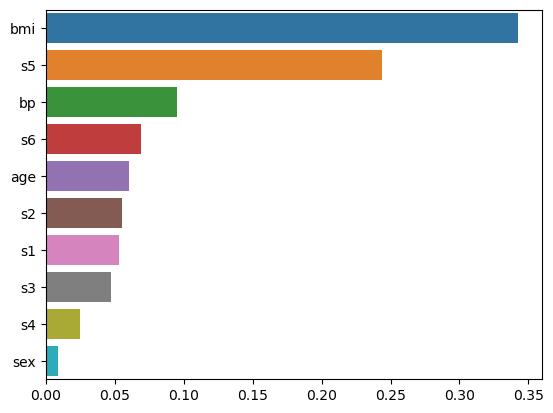

In [15]:
rf_reg.fit(x_train, y_train)

# 트리 기반 모델의 feature importance 시각화
feature_series = pd.Series(data=rf_reg.feature_importances_, index=data.feature_names)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)